# Clustered dotplots

In [1]:
library(tidyverse)
library(ggplot2)
library(cowplot)

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.3.7  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for 

In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

get_celltype_enrichment <- function(){
    datalist = list()
    for(tissue in c('Caudate', 'DLPFC', 'Hippocampus', 'Dentate Gyrus')){
        if(tissue == 'Dentate Gyrus'){
            fn = paste0("../../../dentateGyrus/celltype_enrichment/",
                        "_m/celltype_enrichment_analysis.txt")
        } else {
            fn = paste0("../../../", tolower(tissue),
                        "/celltype_enrichment/_m/celltype_enrichment_analysis.txt")
        }
        
        dat = read_tsv(fn) 
        dat$Tissue <- tissue
        datalist[[tissue]] <- dat
    }
    df = bind_rows(datalist)
    return(df)
}

## Get data

In [3]:
ct <- get_celltype_enrichment() %>% mutate_if(is.character, as.factor)
levels(ct$Direction) <- c("All", "AA Bias", "EA Bias")
ct %>% head(2)


-- Column specification --------------------------------------------------------------------------------------------------------------------------------------
cols(
  Cell_type = col_character(),
  OR = col_double(),
  PValue = col_double(),
  Direction = col_character(),
  FDR = col_double()
)



-- Column specification --------------------------------------------------------------------------------------------------------------------------------------
cols(
  Cell_type = col_character(),
  OR = col_double(),
  PValue = col_double(),
  Direction = col_character(),
  FDR = col_double()
)



-- Column specification --------------------------------------------------------------------------------------------------------------------------------------
cols(
  Cell_type = col_character(),
  OR = col_double(),
  PValue = col_double(),
  Direction = col_character(),
  FDR = col_double()
)



-- Column specification ------------------------------------------------------------------------------

Cell_type,OR,PValue,Direction,FDR,Tissue
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
Astrocytes,1.0914980,0.3690076,EA Bias,0.6443864,Caudate
Cerebellum neurons,0.9548207,0.6633239,EA Bias,0.8528450,Caudate


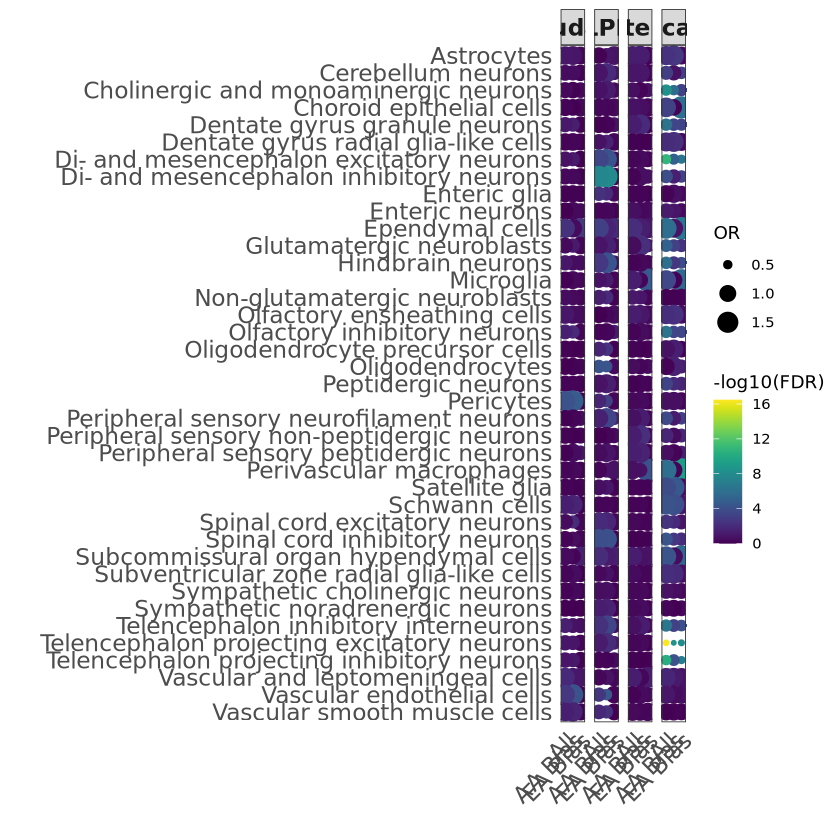

In [4]:
dotplot <- ct %>% 
    mutate(`-log10(FDR)` = -log10(FDR), `OR Percentile` = OR / (1+OR)) %>% 
    filter(OR > 0) %>% 
    ggplot(aes(y=fct_rev(Cell_type), x=Direction, color=`OR Percentile`, 
               size=`-log10(FDR)`)) + 
    geom_point() + ylab('') + xlab('') + facet_grid(~Tissue) +
    scale_color_gradient2(midpoint = 0.5, low = "blue", mid = "white",
                          high = "red", space = "Lab" ) +
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=14), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=14, face="bold"))
save_plot(dotplot, "dotplot_enrichment_celltype", 14, 9)
dotplot

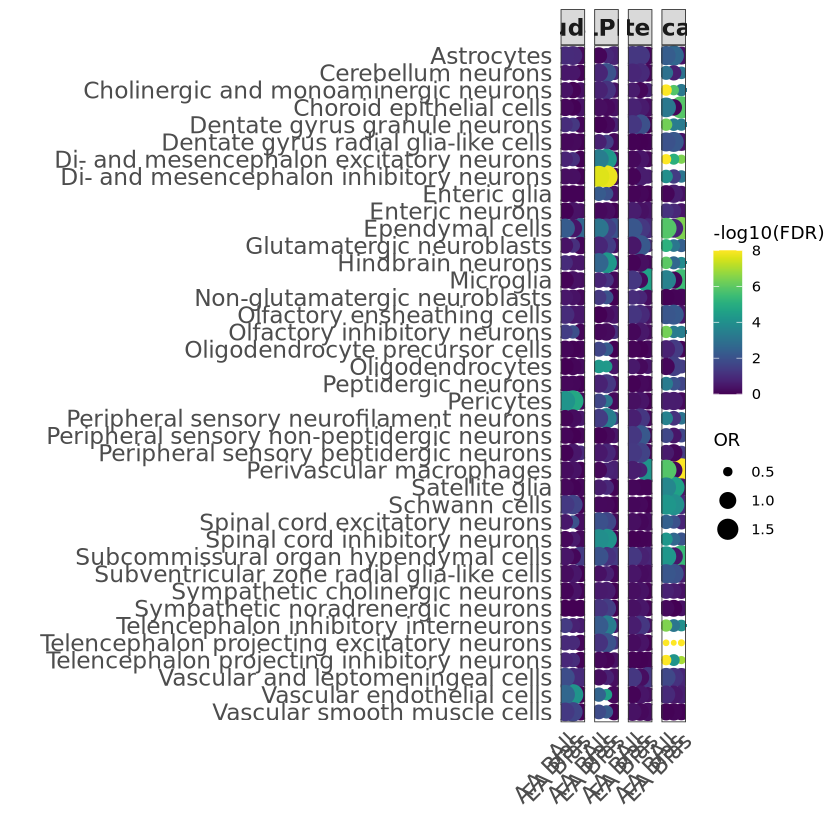

In [6]:
dotplot <- ct %>% 
    mutate(`-log10(FDR)` = -log10(FDR)) %>% 
    filter(OR > 0) %>% 
    ggplot(aes(y=fct_rev(Cell_type), x=Direction, size=OR, color=`-log10(FDR)`)) + 
    geom_point() + ylab('') + xlab('') + facet_grid(~Tissue) +
    scale_color_gradientn(colours = viridis::viridis(20), 
                          oob = scales::squish, limits=c(0, 8)) + 
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=14), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=14, face="bold"))
save_plot(dotplot, "dotplot_enrichment_celltype_limited_pval", 14, 9)
dotplot